## Principal component analysis, or PCA 

In simple words it reduces the number of Columns without the data loss.
It is a Unsupervised machine learning algorithom.

It is a dimensionality-reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

Reducing the number of variables of a data set naturally comes at the expense of accuracy, but the trick in dimensionality reduction is to trade a little accuracy for simplicity. Because smaller data sets are easier to explore and visualize and make analyzing data much easier and faster for machine learning algorithms without extraneous variables to process.

So, to sum up, the idea of PCA is simple — reduce the number of variables of a data set, while preserving as much information as possible.

Remember the concept of 2D to 1D in Graph

For more in Details, Check my github
Rohan Rajendra ( Rohan-max-alt ),  https://github.com/Rohan-max-alt

#### Here Lets See how to implement the PCA usecase

In [7]:
# Library Files 
import matplotlib.pyplot as plt # Visualization 
import pandas as pd             # importing Dataset and data manipulation
import numpy as np              # Creating Multi dimentional arrays 
import seaborn as sns           # Complex Visualization 
%matplotlib inline
# this gives us the ability to display matplot within this notebook

In [4]:
# The Dataset - Here Lets Work with Cancar Dataset avalable inbuilt or on kaggle or in my github.
# why this cancer dataset because it has many or large number of columns and data.
from sklearn.datasets import load_breast_cancer  # this is inbuilt data set.
cancer=load_breast_cancer()

In [11]:
cancer.keys() # because it is in Dictionary format. Therefore dictinary commands.

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [15]:
print(cancer.DESCR) # DESCR is Description of Dictionary Data Set. 

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Here we can see that we have lot of Data Which are Complex to understand and lot of memory consuming, in the Keys of cancer dataset we can see that there are a lot of features and in information we get 30 attributes. 
Here there is only two types of Results which are, 
-WDBC-Malignant
-WDBC-Benign
                

In [21]:
#Lets Take it in DataFream
df= pd.DataFrame(cancer.data,columns=cancer['feature_names'])

In [23]:
df.head() # 3 here is all the Columns and Rows in df DataFrame.

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### PCA Visualization
Here we are having 30 dimensions so ill first convert it into 2 dimension and then plot the perticular graph and see weather i can do pca
First Step is always Normalization/Standardization. ( Standard Scalar ).

As we have obseved before it is difficult to visualize high dimensional data. 
We can use PCA to find the first two Principal components, and visualize the data in this new, two-dimensional space, with a single scatter-plot. Before we do this through, we'll need to scale our data so that each feature has a single unit variance.


In [27]:
#Now lets Visualize 
#First Step as mentioned is Normalization/Standardization.
from sklearn.preprocessing import StandardScaler

In [28]:
scaler=StandardScaler()
scaler.fit(df) # this rescales the values

StandardScaler()

In [29]:
scaled_data=scaler.transform(df) # all the values gets converted into The given scale

So our Data is now Normalized/Standardized 
PCA with scikit Learn uses very similar process to preprocess functions that come with Scikit Learn. We initiate a PCA object, find the principal components using the fit method, then apply the rotation and dimensionality reduction by calling transform( ).

In [30]:
from sklearn.decomposition import PCA # this is the PCA function from decomposition

In [36]:
PCA=PCA(n_components=2) # here we convert 30 features into 2 , we can do it as we like.

TypeError: 'PCA' object is not callable

In [37]:
PCA.fit(scaled_data)

PCA(n_components=2)

In [39]:
x_pca=PCA.transform(scaled_data)

In [40]:
scaled_data.shape # this is the orginal data with 560 Rows and 30 Columns 

(569, 30)

In [42]:
x_pca.shape # now this is the PCA data which is converted from 30 columns to 2 columns.

(569, 2)

Here we have reduced 30 features into 2 features successfully.

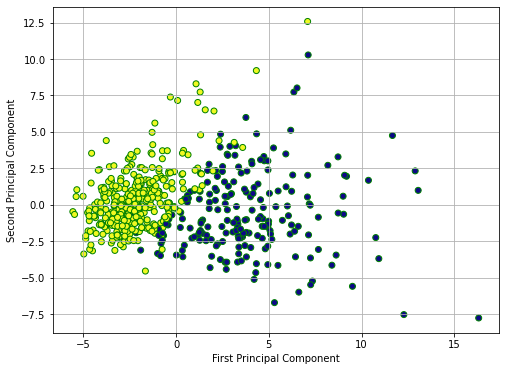

In [48]:
# lets plot the Graph 
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=cancer['target'],cmap='plasma',edgecolors='g') # here c=cancer['target']- based on that we get the coloring 
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.grid()
plt.show()

Now as We can see that using this function we can clearly by uing 2 components we can easily seprate these two classes.
Remember 
1.Standard Scaling 
2.applying PCA - fit and transform.
3. Now we can apply any algorithm on this dataform , this also gives us a good accuracy. we can take this data and apply on any ML alogorithm.

In [55]:
# array format of the Scaled Data before applying PCA
scaled_data

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [54]:
x_pca # array format of df Data After Applying PCA

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

In [56]:
# Here we can give this data to any model to teat and train. 
# By Rohan Rajendra
# r.rohanrajendra@gmail.com
#  7975870924